<a href="https://colab.research.google.com/github/mizgoines/ConsoleApplicationLab1/blob/master/Classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detroit Crime Analysis
https://data.detroitmi.gov/datasets/0825badfe6304620a998d162be0e135e_0?geometry=-83.753%2C42.264%2C-82.445%2C42.442


In [ ]:
import pandas as pd
df1 = pd.read_csv('https://storage.googleapis.com/files.mobibootcamp.com/2021-data-sets/RMS_Crime_Incidents.csv')
df1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
0,-83.171428,42.356303,3005325,1612230018,Mackenzie St & Sorrento St,ROBBERY,ROBBERY,1201,12000,ROBBERY,2016/12/23 12:23:00+00,07:23:00,5,7,2016,0208,02,261635356002005,Aviation Sub,7,48228,-83.171428,42.356303,1
1,-83.131659,42.307950,3006375,1612260215,Lawndale St & Senator St,ARSON,ARSON,2099,20000,ARSON,2016/12/26 08:30:00+00,03:30:00,1,3,2016,0408,04,261635242005001,Springwells,6,48209,-83.131659,42.307950,2
2,-83.226076,42.354101,3012257,1701110189,Artesian St & Constance St,ROBBERY,ROBBERY,1201,12000,ROBBERY,2017/01/11 09:30:00+00,04:30:00,3,4,2017,0610,06,261635460004005,Warrendale,7,48228,-83.226076,42.354101,3
3,-83.096278,42.442265,3025623,1702150169,E Remington Ave & Omira St,ARSON,ARSON,2099,20000,ARSON,2017/02/15 22:40:00+00,17:40:00,3,17,2017,1101,11,261635081004009,Nolan,3,48203,-83.096278,42.442265,4
4,-82.951218,42.446557,3033332,1703020033,Bringard Dr & Cordell St,ARSON,ARSON,2099,20000,ARSON,2017/03/02 12:20:00+00,07:20:00,4,7,2017,0903,09,261635001002002,Regent Park,3,48205,-82.951218,42.446557,5


In [ ]:
(df1['X'] == df1.longitude).value_counts()

False    355993
True          7
dtype: int64

In [ ]:
# santhoshini
df1.drop(['X','Y'] , axis=1 , inplace=True)
df1.head()

,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
0,3005325,1612230018,Mackenzie St & Sorrento St,ROBBERY,ROBBERY,1201,12000,ROBBERY,2016/12/23 12:23:00+00,07:23:00,5,7,2016,0208,02,261635356002005,Aviation Sub,7,48228,-83.171428,42.356303,1
1,3006375,1612260215,Lawndale St & Senator St,ARSON,ARSON,2099,20000,ARSON,2016/12/26 08:30:00+00,03:30:00,1,3,2016,0408,04,261635242005001,Springwells,6,48209,-83.131659,42.307950,2
2,3012257,1701110189,Artesian St & Constance St,ROBBERY,ROBBERY,1201,12000,ROBBERY,2017/01/11 09:30:00+00,04:30:00,3,4,2017,0610,06,261635460004005,Warrendale,7,48228,-83.226076,42.354101,3
3,3025623,1702150169,E Remington Ave & Omira St,ARSON,ARSON,2099,20000,ARSON,2017/02/15 22:40:00+00,17:40:00,3,17,2017,1101,11,261635081004009,Nolan,3,48203,-83.096278,42.442265,4
4,3033332,1703020033,Bringard Dr & Cordell St,ARSON,ARSON,2099,20000,ARSON,2017/03/02 12:20:00+00,07:20:00,4,7,2017,0903,09,261635001002002,Regent Park,3,48205,-82.951218,42.446557,5


In [ ]:
df1.isnull().values.any()

False

In [ ]:
df1['is_duplicate'] = df1.duplicated()

df1.is_duplicate.value_counts()

False    356000
Name: is_duplicate, dtype: int64

In [ ]:
#santhoshini
df1.drop_duplicates(inplace=True)

In [ ]:
print(df1['charge_description'].unique())
print(df1['offense_description'].unique())


['ROBBERY' 'ARSON' 'LARCENY - OTHER' 'FRAUD - IMPERSONATION'
 'FAMILY - OTHER' 'LARCENY FROM GROUNDS' 'TRESPASS' 'RUNAWAY'
 'MOTOR VEHICLE THEFT' 'FRAUD BY WIRE' 'BURGLARY - FORCED ENTRY'
 'ACCIDENT, HIT & RUN' 'STOLEN PROPERTY' 'RETAIL FRAUD - THEFT'
 'INTIMIDATION / STALKING' 'DAMAGE TO PROPERTY' 'EXTORTION'
 'FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE GAME'
 'AGGRAVATED / FELONIOUS ASSAULT' 'LARCENY - THEFT FROM BUILDING'
 'ASSAULT AND BATTERY/SIMPLE ASSAULT' 'WEAPONS OFFENSE - OTHER'
 'FRAUD - CREDIT CARD/AUTOMATIC TELLER MACHINE'
 'CSC 4TH DEGREE - FORCIBLE CONTACT' 'CSC 1ST DEGREE - PENIS / VAGINA'
 'FAMILY - ABUSE / NEGLECT NONVIOLENT'
 'VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)'
 'BURGLARY - ENTRY WITHOUT FORCE (INTENT TO COMMIT)' 'HEALTH AND SAFETY'
 'KIDNAPPING / ABDUCTION'
 'LARCENY - THEFT OF MOTOR VEHICLE PARTS / ACCESSORIES'
 'BURGLARY - FORCED ENTRY - UNOCCUPIED BUILDING'
 'MISCELLANEOUS CRIMINAL OFFENSE' 'WEAPONS OFFENSE - CONCEALED'
 'MURDER / NON-NEGLIGENT MANS

In [ ]:
df1.drop(['oid'] , axis=1 , inplace=True)

In [ ]:
#santhoshini
df1.rename(columns={"report_number":"report_num"},inplace=True)

In [ ]:
print(df1['offense_category'].unique())


['ROBBERY' 'ARSON' 'LARCENY' 'FRAUD' 'FAMILY OFFENSE' 'OTHER' 'RUNAWAY'
 'STOLEN VEHICLE' 'BURGLARY' 'OUIL' 'STOLEN PROPERTY' 'ASSAULT'
 'DAMAGE TO PROPERTY' 'EXTORTION' 'AGGRAVATED ASSAULT' 'WEAPONS OFFENSES'
 'SEX OFFENSES' 'SEXUAL ASSAULT' 'DANGEROUS DRUGS' 'KIDNAPPING'
 'MISCELLANEOUS' 'HOMICIDE' 'FORGERY' 'DISORDERLY CONDUCT'
 'OBSTRUCTING JUDICIARY' 'LIQUOR' 'SOLICITATION' 'OBSTRUCTING THE POLICE'
 'JUSTIFIABLE HOMICIDE' 'GAMBLING']


In [ ]:
df1.set_index('crime_id', drop=True, inplace=True)
print(df1)

          report_num                        address  ...   latitude is_duplicate
crime_id                                             ...                        
3005325   1612230018     Mackenzie St & Sorrento St  ...  42.356303        False
3006375   1612260215       Lawndale St & Senator St  ...  42.307950        False
3012257   1701110189     Artesian St & Constance St  ...  42.354101        False
3025623   1702150169     E Remington Ave & Omira St  ...  42.442265        False
3033332   1703020033       Bringard Dr & Cordell St  ...  42.446557        False
...              ...                            ...  ...        ...          ...
3627470   2105090104        Rosewood St & Bishop St  ...  42.395675        False
3627474   2105090124  Saint Aubin St & Pembridge Pl  ...  42.340840        False
3627480   2105090130    Bentler St & W McNichols Rd  ...  42.414684        False
3627484   2105090143      W Alexandrine St & 3rd St  ...  42.347928        False
3627521   2105090175        

In [ ]:
#santhoshini
print(df1['address'].unique())
print(df1['address'].value_counts())

['Mackenzie St & Sorrento St' 'Lawndale St & Senator St'
 'Artesian St & Constance St' ... 'Leidich St & E I 94 Service Drive'
 'Fitzpatrick St & N M 39 Service Drive' 'W Alexandrine St & Lincoln St']
S M 10 Service Drive & Grand River Ave    700
John R St & W Brentwood St                537
Bagley St & 3rd St                        520
Saint Antoine St & E Lafayette St         421
Mack Ave & Beaubien St                    390
                                         ... 
Cambridge Ave & W Outer Dr                  1
17th St & W Fort St                         1
Burlingame St & S M 10 Service Drive        1
Roby St & E Ferry St                        1
W Jefferson Ave & Voss St                   1
Name: address, Length: 15852, dtype: int64


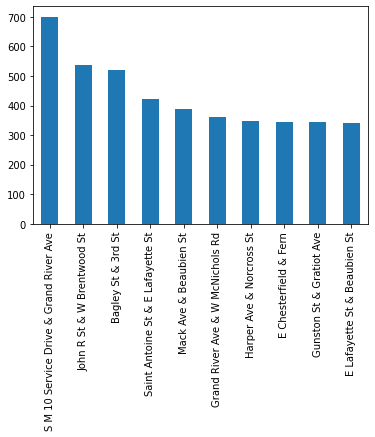

In [ ]:
#santhoshini
df1['address'].value_counts().nlargest(10).plot(kind='bar')

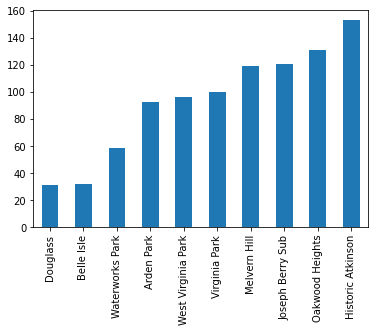

In [ ]:
#santhoshini
df1['neighborhood'].value_counts().nsmallest(10).plot(kind='bar')

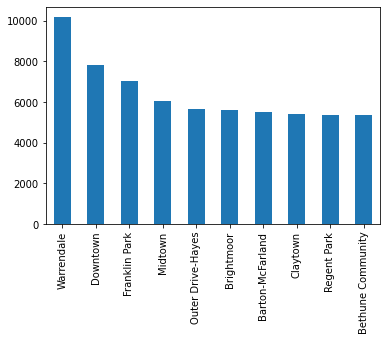

In [ ]:
#santhoshini
df1['neighborhood'].value_counts().nlargest(10).plot(kind='bar')

In [ ]:
print(df1['offense_category'].value_counts())

ASSAULT                   64532
LARCENY                   54033
DAMAGE TO PROPERTY        44450
AGGRAVATED ASSAULT        36975
BURGLARY                  29943
FRAUD                     29037
STOLEN VEHICLE            28667
WEAPONS OFFENSES          11354
ROBBERY                    9544
DANGEROUS DRUGS            8279
SEX OFFENSES               5550
OBSTRUCTING JUDICIARY      5203
STOLEN PROPERTY            4289
ARSON                      3434
SEXUAL ASSAULT             3360
OUIL                       2784
FAMILY OFFENSE             2336
OBSTRUCTING THE POLICE     2322
MISCELLANEOUS              2094
RUNAWAY                    1571
DISORDERLY CONDUCT         1317
HOMICIDE                   1227
FORGERY                    1090
OTHER                      1041
KIDNAPPING                  854
LIQUOR                      414
EXTORTION                   192
JUSTIFIABLE HOMICIDE         72
SOLICITATION                 29
GAMBLING                      7
Name: offense_category, dtype: int64


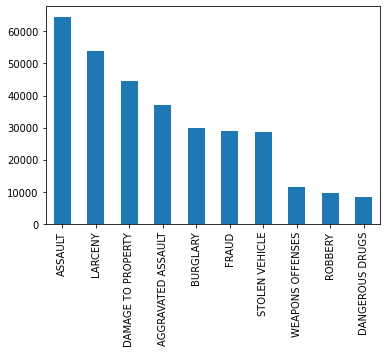

In [ ]:
df1['offense_category'].value_counts().nlargest(10).plot(kind='bar')

In [ ]:
groups = df1.groupby(['offense_category', 'neighborhood'])
print(groups.size())

offense_category    neighborhood    
AGGRAVATED ASSAULT  Airport Sub         427
                    Arden Park            4
                    Aviation Sub         99
                    Bagley              402
                    Barton-McFarland    709
                                       ... 
WEAPONS OFFENSES    Westwood Park        38
                    Wildemere Park       13
                    Winship             121
                    Woodbridge           27
                    Yorkshire Woods     106
Length: 5107, dtype: int64


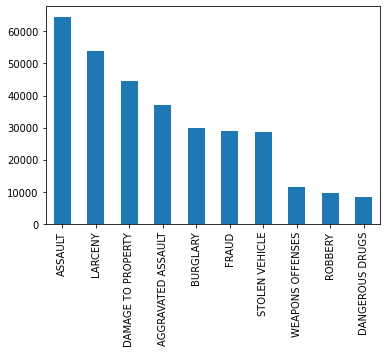

In [ ]:
df1['offense_category'].value_counts().nlargest(10).plot(kind='bar')


# Border Crossing

https://data.bts.gov/Research-and-Statistics/Border-Crossing-Entry-Data/keg4-3bc2/data

In [ ]:
df2 = pd.read_csv('https://storage.googleapis.com/files.mobibootcamp.com/2021-data-sets/Border_Crossing_Entry_Data.csv', parse_dates=[4])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364510 entries, 0 to 364509
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  364510 non-null  object        
 1   State      364510 non-null  object        
 2   Port Code  364510 non-null  int64         
 3   Border     364510 non-null  object        
 4   Date       364510 non-null  datetime64[ns]
 5   Measure    364510 non-null  object        
 6   Value      364510 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 19.5+ MB


In [ ]:
#Angelia
df2['Measure'].unique()

array(['Personal Vehicle Passengers', 'Personal Vehicles',
       'Truck Containers Empty', 'Truck Containers Loaded', 'Trucks',
       'Pedestrians', 'Rail Containers Empty', 'Rail Containers Loaded',
       'Train Passengers', 'Trains', 'Buses', 'Bus Passengers'],
      dtype=object)

In [ ]:
# Toni Hall
print(df2.columns)
df2.columns = df2.columns.str.lower()
print(df2.columns)

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure',
       'Value'],
      dtype='object')
Index(['port name', 'state', 'port code', 'border', 'date', 'measure',
       'value'],
      dtype='object')


In [ ]:
#Toni Hall
df2.head(-3)


,port name,state,port code,border,date,measure,value
0,Alcan,Alaska,3104,US-Canada Border,2021-01-01,Personal Vehicle Passengers,690
1,Alcan,Alaska,3104,US-Canada Border,2021-01-01,Personal Vehicles,444
2,Alcan,Alaska,3104,US-Canada Border,2021-01-01,Truck Containers Empty,350


In [ ]:
#santhoshini
df2.columns = df2.columns.str.replace(' ', '_')
df2.head()

,Port_Name,State,Port_Code,Border,Date,Measure,Value
0,Alcan,Alaska,3104,US-Canada Border,2021-01-01,Personal Vehicle Passengers,690
1,Alcan,Alaska,3104,US-Canada Border,2021-01-01,Personal Vehicles,444
2,Alcan,Alaska,3104,US-Canada Border,2021-01-01,Truck Containers Empty,350
3,Alcan,Alaska,3104,US-Canada Border,2021-01-01,Truck Containers Loaded,51
4,Alcan,Alaska,3104,US-Canada Border,2021-01-01,Trucks,416


In [ ]:
#santhoshini
df2.columns = df2.columns.str.lower()

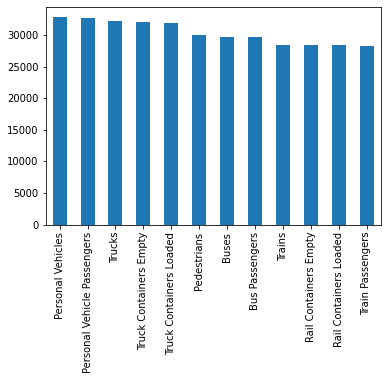

In [ ]:
#santhoshini
df2['measure'].value_counts().plot(kind='bar')

In [ ]:
#santhoshini
print(df2['port_name'].unique())

['Alcan' 'Alexandria Bay' 'Ambrose' 'Andrade' 'Antler' 'Baudette'
 'Beecher Falls' 'Blaine' 'Boquillas' 'Boundary' 'Bridgewater'
 'Brownsville' 'Buffalo Niagara Falls' 'Calais' 'Calexico' 'Calexico East'
 'Carbury' 'Champlain Rouses Point' 'Columbus' 'Dalton Cache' 'Danville'
 'Del Bonita' 'Del Rio' 'Derby Line' 'Detroit' 'Douglas' 'Dunseith'
 'Eagle Pass' 'Eastport' 'El Paso' 'Ferry' 'Fort Fairfield' 'Fort Kent'
 'Fortuna' 'Frontier' 'Grand Portage' 'Hannah' 'Hansboro' 'Hidalgo'
 'Highgate Springs' 'Houlton' 'International Falls' 'Jackman' 'Lancaster'
 'Laredo' 'Laurier' 'Limestone' 'Lukeville' 'Lynden' 'Madawaska' 'Maida'
 'Massena' 'Metaline Falls' 'Morgan' 'Naco' 'Neche' 'Nighthawk' 'Nogales'
 'Noonan' 'Northgate' 'Norton' 'Ogdensburg' 'Opheim' 'Oroville'
 'Otay Mesa' 'Pembina' 'Piegan' 'Pinecreek' 'Point Roberts' 'Portal'
 'Porthill' 'Port Huron' 'Presidio' 'Progreso' 'Raymond' 'Richford'
 'Rio Grande City' 'Roma' 'Roosville' 'Roseau' 'San Luis' 'Santa Teresa'
 'San Ysidro' 'Sarle

In [ ]:
#santhoshini
print(df2['port_name'].value_counts())

Eastport                 5955
Nogales                  3636
El Paso                  3631
Buffalo Niagara Falls    3618
Calexico East            3614
                         ... 
Boquillas                 269
Ysleta                     73
Cross Border Xpress        39
Algonac                    35
Toledo                     10
Name: port_name, Length: 117, dtype: int64


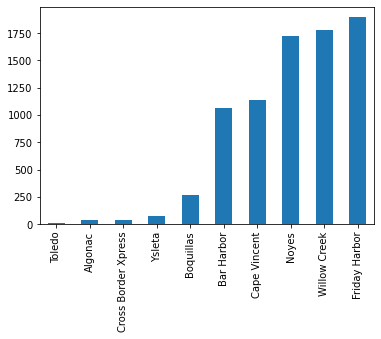

In [ ]:
#santhoshini
df2['port_name'].value_counts().nsmallest(10).plot(kind='bar')

In [ ]:
#santhoshini
df2['is_duplicate'] = df2.duplicated()

df2.is_duplicate.value_counts()

False    364500
True         10
Name: is_duplicate, dtype: int64

In [ ]:
#santhoshini
df2.drop_duplicates(inplace=True)

In [ ]:
#santhoshini
groups = df2.groupby(['state', 'port_name'])
print(groups.size())

state       port_name    
Alaska      Alcan            3324
            Dalton Cache     3316
            Ketchikan        1963
            Skagway          3382
Arizona     Douglas          3409
                             ... 
Washington  Nighthawk        3094
            Oroville         3383
            Point Roberts    3378
            Port Angeles     2239
            Sumas            3614
Length: 118, dtype: int64


In [ ]:
df2.isnull().values.any()

False

In [ ]:
df2['value'] = df2['value'].astype(float)

df2.info

<bound method DataFrame.info of        port_name    state  ...  value is_duplicate
0          Alcan   Alaska  ...  690.0        False
1          Alcan   Alaska  ...  444.0        False
2          Alcan   Alaska  ...  350.0        False
3          Alcan   Alaska  ...   51.0        False
4          Alcan   Alaska  ...  416.0        False
...          ...      ...  ...    ...          ...
364505  Whitlash  Montana  ...    0.0        False
364506  Whitlash  Montana  ...   63.0        False
364507  Whitlash  Montana  ...    0.0        False
364508  Whitlash  Montana  ...    0.0        False
364509  Whitlash  Montana  ...  123.0        False

[364510 rows x 8 columns]>

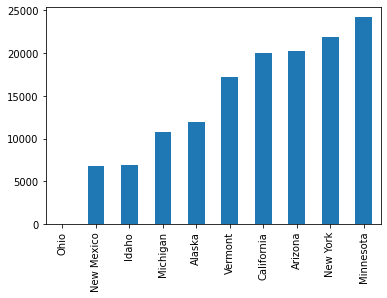

In [ ]:

df2['state'].value_counts().nsmallest(10).plot(kind='bar')

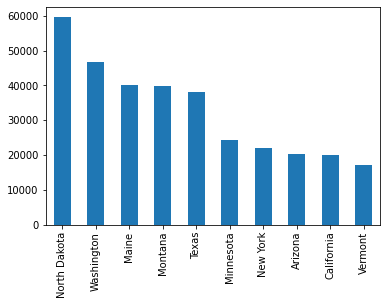

In [ ]:

df2['state'].value_counts().nlargest(10).plot(kind='bar')

In [ ]:
pd.to_numeric(df2['value'], errors='coerce')

0         690.0
1         444.0
2         350.0
3          51.0
4         416.0
          ...  
364505      0.0
364506     63.0
364507      0.0
364508      0.0
364509    123.0
Name: value, Length: 364510, dtype: float64